<a href="https://colab.research.google.com/github/mia1996/rlcard-tutoirial/blob/master/leduc_single_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# <a href='https://github.com/datamllab/rlcard'> <center> <img src='https://miro.medium.com/max/1000/1*_9abDpNTM9Cbsd2HEXYm9Q.png' width=500 class='center' /></a> 

## **Leduc Hold'em as Single-Agent Environment**
We have wrraped the environment as single agent environment by assuming that other players play with pre-trained models. The interfaces are exactly the same to OpenAI Gym. Thus, any single-agent algorithm can be connected to the environment. An example of Leduc Hold'em is as below:

* First, we install RLcard and Tensorflow. To use Tensorflow implementation of the example algorithms, we recommend installing the supported verison of Tensorflow with `rlcard[tensorflow]`.

In [0]:
pip install rlcard

In [0]:
pip install rlcard[tensorflow]

* Then, we import `DQNAgent` and `RandomAgent` from RLCard. We make the environment, set the iterations numbers, initialize the memory size, and specify how often we evaluate the performance. After that we set `log_dir` as `./experiments/leduc_holdem_single_dqn_result/`, where the training logs will be stored in this path.

In [0]:
import tensorflow as tf
import os
import numpy as np

import rlcard
from rlcard.agents import DQNAgent
from rlcard.agents import RandomAgent
from rlcard.utils import set_global_seed, tournament
from rlcard.utils import Logger

In [0]:
# Make environment
env = rlcard.make('leduc-holdem', config={'seed': 0, 'single_agent_mode':True})
eval_env = rlcard.make('leduc-holdem', config={'seed': 0, 'single_agent_mode':True})


In [0]:

# Set the iterations numbers and how frequently we evaluate/save plot
evaluate_every = 1000
evaluate_num = 10000
timesteps = 10000

# The intial memory size
memory_init_size = 1000

# Train the agent every X steps
train_every = 1

# The paths for saving the logs and learning curves
log_dir = './experiments/leduc_holdem_single_dqn_result/'

# Set a global seed
set_global_seed(0)

* Now we initialize a global step of Tensorflow and creat an DQN agent. The Logger will store the training logs to `log_dir` and plot the learning curve. We start the training of DQN with `run` function. The training logs and the learning curves are shown as below.

In [0]:
with tf.Session() as sess:

    # Initialize a global step
    global_step = tf.Variable(0, name='global_step', trainable=False)

    # Set up the agents
    agent = DQNAgent(sess,
                     scope='dqn',
                     action_num=env.action_num,
                     replay_memory_init_size=memory_init_size,
                     train_every=train_every,
                     state_shape=env.state_shape,
                     mlp_layers=[128,128])
    # Initialize global variables
    sess.run(tf.global_variables_initializer())

    # Init a Logger to plot the learning curve
    logger = Logger(log_dir)

    state = env.reset()

    for timestep in range(timesteps):
        action = agent.step(state)
        next_state, reward, done = env.step(action)
        ts = (state, action, reward, next_state, done)
        agent.feed(ts)

        if timestep % evaluate_every == 0:
            rewards = []
            state = eval_env.reset()
            for _ in range(evaluate_num):
                action, _ = agent.eval_step(state)
                _, reward, done = env.step(action)
                if done:
                    rewards.append(reward)
            logger.log_performance(env.timestep, np.mean(rewards))



Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).
Instructions for updating:
Please use `layer.__call__` method instead.
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.flatten instead.





Instructions for updating:
Please switch to tf.train.get_global_step

----------------------------------------
  timestep     |  20069
  reward       |  -1.7734082397003745
----------------------------------------
INFO - Agent dqn, step 1000, rl-loss: 1.709949016571045WAR

./experiments/leduc_holdem_single_dqn_result/performance.csv


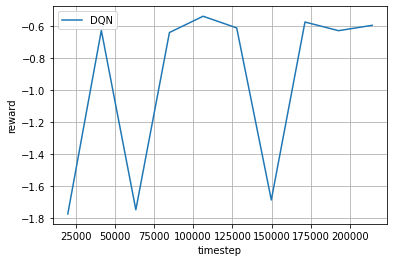

In [0]:
# Close files in the logger
logger.close_files()

# Plot the learning curve
logger.plot('DQN')
    